## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', names= ['DATE', 'TAG', 'POSTS'], header = 0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [87]:
df.head(10)
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,162,162
c,162,162
c#,163,163
c++,162,162
delphi,162,162
go,147,147
java,162,162
javascript,162,162
perl,162,162


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.columns
df.shape


(2244, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2244
TAG      2244
POSTS    2244
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
sum = df.groupby('TAG').sum()
sum.sort_values('POSTS', ascending= False)

,POSTS
TAG,
javascript,2327987
python,1878830
java,1823954
c#,1519419
php,1426608
c++,752553
r,434555
c,373188
swift,308288


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,162,162
c,162,162
c#,163,163
c++,162,162
delphi,162,162
go,147,147
java,162,162
javascript,162,162
perl,162,162


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df.DATE[1]

'2008-08-01 00:00:00'

In [ ]:
type(df.DATE[1])

str

In [ ]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))
df.DATE = pd.to_datetime(df.DATE)
df.head()

2008-08-01 00:00:00


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values= "POSTS")


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
2008-12-01,17.0,189.0,1596.0,632.0,134.0,NaN,830.0,626.0,134.0,480.0,440.0,1.0,161.0,NaN
2009-01-01,22.0,321.0,2378.0,851.0,164.0,NaN,1149.0,792.0,148.0,635.0,631.0,8.0,207.0,1.0
2009-02-01,37.0,332.0,2599.0,843.0,167.0,NaN,1208.0,948.0,165.0,766.0,629.0,9.0,287.0,1.0
2009-03-01,24.0,431.0,3163.0,1052.0,162.0,NaN,1438.0,1007.0,138.0,901.0,764.0,4.0,330.0,1.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(163, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      162
c             162
c#            163
c++           162
delphi        162
go            147
java          162
javascript    162
perl          162
php           162
python        162
r             160
ruby          162
swift         154
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True) 
reshaped_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,163.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
import matplotlib.pyplot as plt

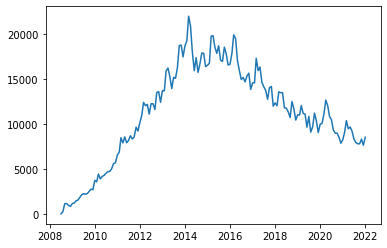

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)

In [ ]:
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

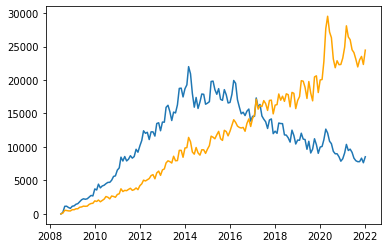

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python, color='orange')

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

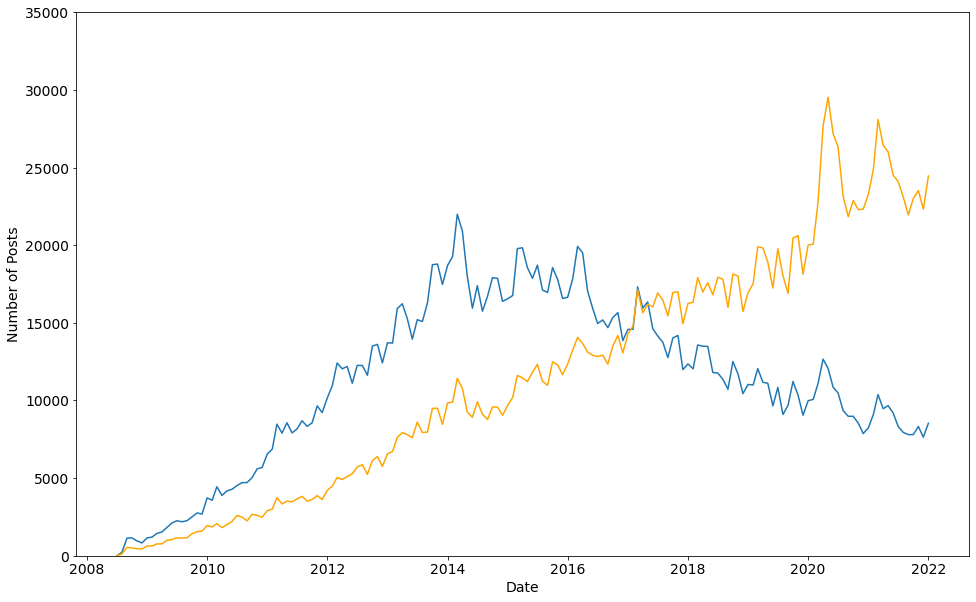

In [ ]:

plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index,reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python, color='orange')

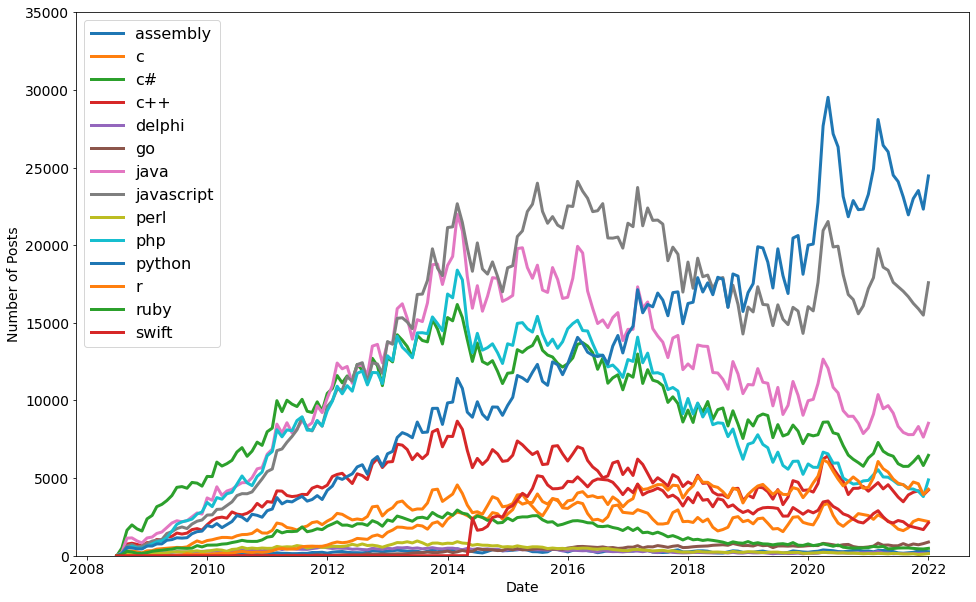

In [ ]:
#plot all languages using for loop
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],linewidth=3,label=reshaped_df[column].name)
plt.legend(fontsize=16) 


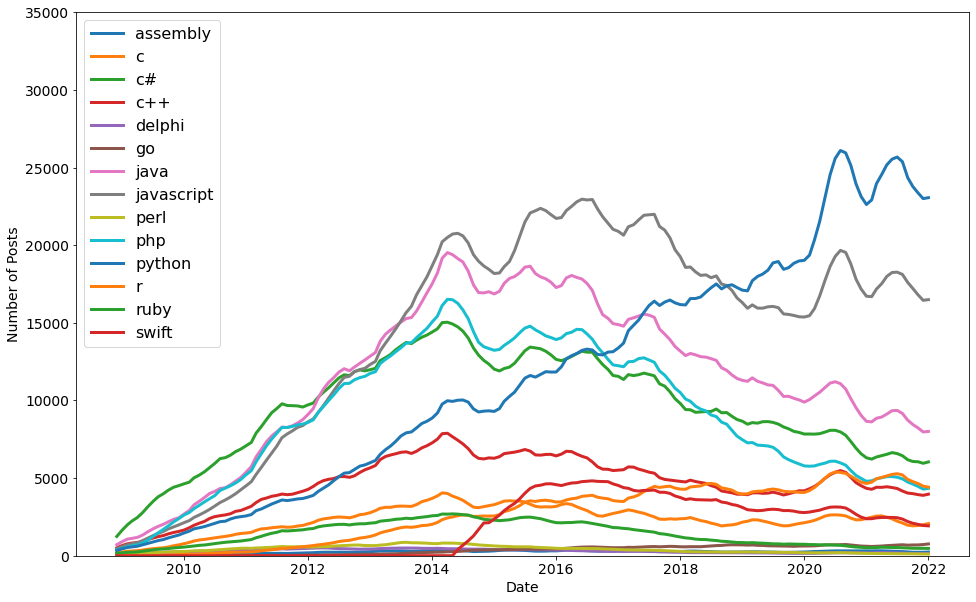

In [ ]:
# The window is number of observations that are averaged
roll_df= reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index,
           roll_df[column],
           linewidth=3,
           label=roll_df[column].name)
plt.legend(fontsize=16) 